In [9]:
%matplotlib widget

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("res.csv")

df["RX_TIME"] = df["RX_End"] - df["RX_Start"]
df["TX_TIME"] = df["TX_End"] - df["TX_Start"]
df["LATENCY"] = df["RX_End"] - df["TX_End"]

res = df.groupby("Wait_Time")[["RX_TIME", "TX_TIME", "LATENCY"]].median().reset_index()

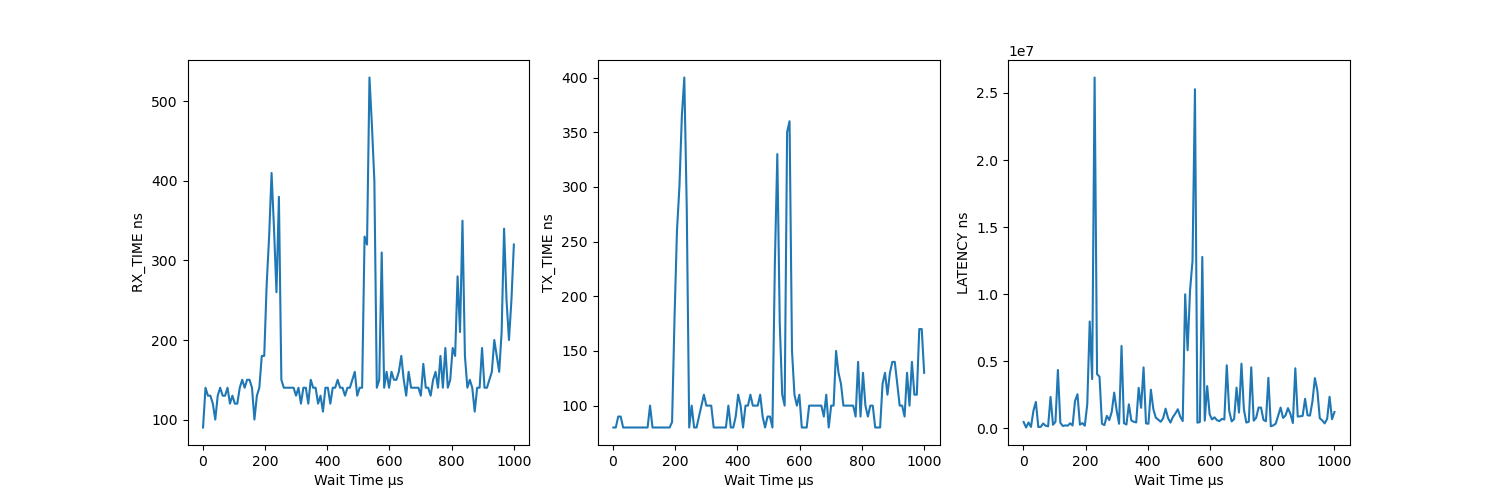

In [12]:
res = res.sort_values("Wait_Time")

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

for i, col in enumerate(["RX_TIME", "TX_TIME", "LATENCY"]):
    axs[i].plot(res["Wait_Time"] / 1000, res[col], label=col)
    axs[i].set_xlabel("Wait Time μs")
    axs[i].set_ylabel(f"{col} ns")

plt.show()